# Plus proche voisin

Nous avons tous entendu parler de la reconnaissance faciale par des programmes d'"intelligence artificielle".

![AI](face.jpg)

En résumant et simplifiant énormément, ces programmes extraient des données d'une photo et comparent celles-ci à des données d'un base. Les données les plus proches correspondent sans doute à la personne qui avait été prise en photo initialement...

Il s'agit donc à un moment de trouver quel est, parmi un grand nombre de points, celui qui est le plus proche du "visage" étudié.

![plus proche](nearest.png)

L'algorithme du "Plus Proche Voisin", ou _"Nearest Neighbour_ en anglais, utilise cette démarche :
* on connaît les coordonnées d'un point
* on connaît les coordonnées de nombreux points d'une base de données
* pour chaque point de la base, on calcule la distance au point de référence
* on trie les résultats
* le résultat ets le point le plus proche

# En deux dimsensions

Le code ci-dessous génère aléatoirement des points dans le plan :

In [7]:
def points_aleatoires(nb_points, mini, maxi) :
    """
    Génère nb_points points dont les coordonnées sont des entiers aléatoires compris entre mini et maxi
    nb_points est un entier
    mini est l'abscisse minimale des points
    maxi est l'abscisse maximale des points
    Retourne une liste contenant les points sous forme de couples
    """
    
    from random import randint
    
    assert type(nb_points) == int, "Le nombre de points doit être un entier"
    assert type(mini) == int, "Le minimum doit être un entier"
    assert type(maxi) == int, "Le maximum doit être un entier"
    assert mini <= maxi, "Le minimum doit être plus petit que le maximum"
    
    return [(randint(mini, maxi), randint(mini, maxi)) for i in range(nb_points)]

In [10]:
liste = points_aleatoires(20, -10, 10)

In [11]:
liste

[(-4, 5),
 (3, 4),
 (-6, -4),
 (6, 3),
 (2, -6),
 (10, -6),
 (-1, 4),
 (2, -5),
 (8, -4),
 (6, 7),
 (4, -10),
 (6, 2),
 (-3, 7),
 (0, -5),
 (-2, 2),
 (-10, -5),
 (-4, 5),
 (-3, -6),
 (0, -6),
 (1, 4)]

Chaque point est codé à l'aide d'un ``tuple``. Cette structure de données Python se manipule comme une liste. Les valeurs ne sont par contre pas modifiables.

In [12]:
# Le premier point
premier = liste[0]

In [13]:
premier

(-4, 5)

In [14]:
# L'abscisse du premier point
premier[0]

-4

In [15]:
# L'ordonnée du premier point
premier[1]

5

1. Ecrire le code permettant de créer une liste de 50 points dont les coordonnées sont comprises entre -15 et 15.

In [1]:
# Votre code

In [ ]:
# Vérification => Affichage de la liste
liste

2. Ecrire le code permettant d'afficher les abscisses de chacun de ces points

In [3]:
# Votre code

Pour visualiser, on peut utiliser ``matplotlib`` :

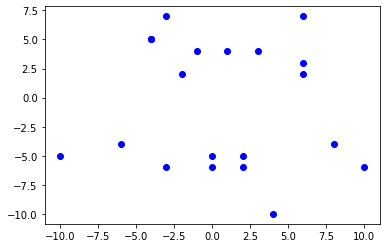

In [16]:
import matplotlib.pyplot as plt

for point in liste :
    plt.plot(point[0], point[1], "bo")

plt.show()

Nous allons désormais coder la fonction calculant la distance entre deux points.

On rappelle que la distance "euclidienne" entre deux points $A$ et $B$ vaut :

$$AB = \sqrt{(x_A-x_B)^2+(y_A-y_B)^2}$$

Cette fonction prendra en argument deux points (sous forme de tuples) et renverra leur distance.

3. Coder la fonction ``distance`` :

In [4]:
# Import

def distance(point1, point2) :
    """
    Calcule la distance euclidienne entre les deux points fournis en argument
    point1 et point2 sont des points de deux coordonnées fournis sous forme de tuple
    Retourne la distance
    """
    
    # Votre code

Nous allons désormais déterminer quel est le point le plus proche de l'origine. POur ce faire on utilise l'algorithme suivant :

        origine est la point de coordonnées (0, 0)

        rang_plus_proche = 0     // Initialement le point le plus proche est le premier
        distance_mini = + infini     // On initialise la distance minimale à une grande valeur
        rang = 0     // On commence par le premier point
        
        Pour tous les point de liste :
            Si distance(point, origine) < distance_mini :
                rang_plus_proche = rang
                distance_mini = distance(point, origine)
            rang = rang + 1
        
        Afficher rang_plus_proche

4. Coder cet algorithme. On utilisera ``float("Inf")`` pour initialiser la distance minimale

In [5]:
# Votre code

5. Placer ce code dans une fonction qui prendra en argument :
    * la liste des points
    * le point de référence

Cette fonction renverra l'indice du point le plus proche

In [6]:
def plus_proche(liste_points , ref) :
    """
    Fonction déterminant le point le plus proche du point de référence parmi une liste de points
    liste_point est une liste de points
    ref est un point
    Retourne l'indice du point le plus proche de ref dans liste_points
    """
    
    # Votre code

# En n-dimensions !

Dans bien des cas, les données que nous manipulons ne sont pas en deux dimensions... Les notes d'un élèves peuvent par exemple est représentées par un point à 9 dimensions :
* français
* LVA
* LVB
* HG
* Sciences
* EPS
* Spé 1
* Spé 2
* Spé 3

Dans le même esprit, le fichier ``glass_simple.csv`` contient des informations sur la composition chimique de différents types de verre :
* RI: refractive index
* Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
* Mg: Magnesium
* Al: Aluminum
* Si: Silicon
* K: Potassium
* Ca: Calcium
* Ba: Barium
* Fe: Iron

Quel échantillon est le plus proche de celui-ci (1.51796,13.5,3.36,1.63,71.94,0.57,8.81,0,0.09) ?

Tout d'abord, on importe les données :

In [42]:
verres = []

with open("glass_simple.csv", "r") as f :
    for ligne in f :
        datas = ligne.strip().split(",")
        echantillon = tuple(float(d) for d in datas)
        verres.append(echantillon)

In [43]:
verres

[(1.52101, 13.64, 4.49, 1.1, 71.78, 0.06, 8.75, 0.0, 0.0),
 (1.51761, 13.89, 3.6, 1.36, 72.73, 0.48, 7.83, 0.0, 0.0),
 (1.51618, 13.53, 3.55, 1.54, 72.99, 0.39, 7.78, 0.0, 0.0),
 (1.51766, 13.21, 3.69, 1.29, 72.61, 0.57, 8.22, 0.0, 0.0),
 (1.51742, 13.27, 3.62, 1.24, 73.08, 0.55, 8.07, 0.0, 0.0),
 (1.51596, 12.79, 3.61, 1.62, 72.97, 0.64, 8.07, 0.0, 0.26),
 (1.51743, 13.3, 3.6, 1.14, 73.09, 0.58, 8.17, 0.0, 0.0),
 (1.51756, 13.15, 3.61, 1.05, 73.24, 0.57, 8.24, 0.0, 0.0),
 (1.51918, 14.04, 3.58, 1.37, 72.08, 0.56, 8.3, 0.0, 0.0),
 (1.51755, 13.0, 3.6, 1.36, 72.99, 0.57, 8.4, 0.0, 0.11),
 (1.51571, 12.72, 3.46, 1.56, 73.2, 0.67, 8.09, 0.0, 0.24),
 (1.51763, 12.8, 3.66, 1.27, 73.01, 0.6, 8.56, 0.0, 0.0),
 (1.51589, 12.88, 3.43, 1.4, 73.28, 0.69, 8.05, 0.0, 0.24),
 (1.51748, 12.86, 3.56, 1.27, 73.21, 0.54, 8.38, 0.0, 0.17),
 (1.51763, 12.61, 3.59, 1.31, 73.29, 0.58, 8.5, 0.0, 0.0),
 (1.51761, 12.81, 3.54, 1.23, 73.24, 0.58, 8.39, 0.0, 0.0),
 (1.51784, 12.68, 3.67, 1.16, 73.11, 0.61, 8.7, 

Les données ne sont plus en dimensions 2 : nous devons réécrire la fonction ``distance``.

        fonction distance(point1, point2) :
            dimension = longueur(point1)
            somme_carré = 0
            
            Pour i allant de 0 à dimension - 1 :
                somme_carré += (point1[i] - point2[i])**2
               
            Retourne la racine carrée de somme_carré

1. Ecrire la nouvelle fonction ``distance`` :

In [7]:

def distance(point1, point2) :
    """
    Calcule la distance euclidienne entre les deux points fournis en argument
    point1 et point2 sont des points de deux coordonnées fournis sous forme de tuple
    Retourne la distance
    """
    
    # Votre code

2. Quel est l'échantillon le plus proche de celui proposé ?

In [8]:
# Votre code